## The imports and helper functions should not be modified in any way.

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [3]:
def evaluate(model, test_data):
    '''
        Do not modify this code.
    '''
    test_loader = DataLoader(Dataset(test_data), batch_size=1)
    loss_fn = torch.nn.MSELoss()
    with torch.no_grad():
        total_loss = 0
        for x, y in test_loader:
            pred = model(x)
            total_loss += loss_fn(pred, y).item()
    print("TOTAL EVALUATION LOSS: {0:.5f}".format(total_loss))

In [4]:
def plot_training_curves(train_loss, val_loss, loss_fn_name, reduction):
    '''
        Do not modify this code.
    '''
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(train_loss, label="Train Loss")
    ax.plot(val_loss, label="Validation Loss")
    ax.legend(loc='best')
    ax.set_title("Loss During Training", fontsize=16)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel("Loss: {}(reduction={})".format(loss_fn_name, reduction), fontsize=14)
    plt.savefig("./example_loss.pdf")
    plt.show()

## a) Implement your dataset object.

Do not modify the function definitions. Please note that the first five columns of the airfoil data are features and the last column is the target. Your dataset should have one attribute for the features, one attribute for the targets, and should return the specified features and target in `__getitem__()` as separate values.

In [5]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, airfoil_data):
        self.features = torch.tensor(airfoil_data[:, :-1], dtype=torch.float32)
        self.targets = torch.tensor(airfoil_data[:, -1], dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx].unsqueeze(0)

## b) Implement the model architecture and `forward` function.

Do not modify the function definitions. You will need to define input, hidden, and output layers, as well as the activation function.

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[256,320,256], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()

        layers = []
        in_dim = input_dimension

        for h_dim in hidden:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(activation)
            in_dim = h_dim
        
        
        layers.append(nn.Linear(in_dim, output_dimension))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


## c, d) Define hyperparameters and implement the training loop.

You will need to choose your loss function, number of epochs, optimizer learning rate, optimizer weight decay, and batch size for part (c). You will need to set up the DataLoader, implement the forward pass, and implement the backpropagation update.

In [7]:
def train(model, train_data, validation_data):
    loss_fn = nn.MSELoss()
    epochs = 2000  # You can adjust this
    learning_rate = 1e-3  # You can adjust this
    weight_decay = 1e-8  # You can adjust this
    batch_size = 128  # You can adjust this

    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x, y in validation_loader:
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()

        if ep % 100 == 0:
            print(f"Epoch {ep}: Train Loss: {train_loss}, Validation Loss: {val_loss}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    torch.save(model.state_dict(), "./p1_model.pt")

    return model


## e) Load your data, then train and evaluate your model before plotting the training curves.

  0%|          | 3/2000 [00:00<01:16, 26.18it/s]

Epoch 0: Train Loss: 5.329455599188805, Validation Loss: 1.2769657671451569


  5%|▌         | 104/2000 [00:03<01:06, 28.66it/s]

Epoch 100: Train Loss: 0.3013339005410671, Validation Loss: 0.3091937229037285


 10%|█         | 206/2000 [00:07<01:06, 26.84it/s]

Epoch 200: Train Loss: 0.18211006745696068, Validation Loss: 0.21854282170534134


 15%|█▌        | 306/2000 [00:11<00:58, 28.79it/s]

Epoch 300: Train Loss: 0.11533759767189622, Validation Loss: 0.1969885379076004


 20%|██        | 403/2000 [00:14<00:55, 29.03it/s]

Epoch 400: Train Loss: 0.08575547905638814, Validation Loss: 0.18294525146484375


 25%|██▌       | 506/2000 [00:17<00:50, 29.51it/s]

Epoch 500: Train Loss: 0.08979652356356382, Validation Loss: 0.19897137954831123


 30%|███       | 602/2000 [00:21<01:25, 16.35it/s]

Epoch 600: Train Loss: 0.04505224386230111, Validation Loss: 0.18710561096668243


 35%|███▌      | 703/2000 [00:25<00:53, 24.45it/s]

Epoch 700: Train Loss: 0.02832318190485239, Validation Loss: 0.174976147711277


 40%|████      | 806/2000 [00:29<00:40, 29.13it/s]

Epoch 800: Train Loss: 0.026030961540527642, Validation Loss: 0.18314053118228912


 45%|████▌     | 904/2000 [00:33<00:49, 22.08it/s]

Epoch 900: Train Loss: 0.03837764705531299, Validation Loss: 0.18592175841331482


 50%|█████     | 1006/2000 [00:37<00:35, 27.97it/s]

Epoch 1000: Train Loss: 0.02458283642772585, Validation Loss: 0.17437122762203217


 55%|█████▌    | 1105/2000 [00:42<00:41, 21.65it/s]

Epoch 1100: Train Loss: 0.03362941858358681, Validation Loss: 0.1762428879737854


 60%|██████    | 1204/2000 [00:45<00:31, 25.39it/s]

Epoch 1200: Train Loss: 0.02815793384797871, Validation Loss: 0.17724738642573357


 65%|██████▌   | 1303/2000 [00:50<00:26, 25.84it/s]

Epoch 1300: Train Loss: 0.007269443056429736, Validation Loss: 0.17443522065877914


 70%|███████   | 1405/2000 [00:54<00:23, 25.06it/s]

Epoch 1400: Train Loss: 0.049344592494890094, Validation Loss: 0.1822688728570938


 75%|███████▌  | 1504/2000 [00:58<00:20, 24.51it/s]

Epoch 1500: Train Loss: 0.013515761645976454, Validation Loss: 0.17739278078079224


 80%|████████  | 1606/2000 [01:02<00:15, 24.92it/s]

Epoch 1600: Train Loss: 0.038904666900634766, Validation Loss: 0.19131050631403923


 85%|████████▌ | 1705/2000 [01:07<00:13, 22.40it/s]

Epoch 1700: Train Loss: 0.016256026225164533, Validation Loss: 0.18838884681463242


 90%|█████████ | 1804/2000 [01:11<00:07, 26.94it/s]

Epoch 1800: Train Loss: 0.11628879234194756, Validation Loss: 0.19483798742294312


 95%|█████████▌| 1905/2000 [01:15<00:04, 23.18it/s]

Epoch 1900: Train Loss: 0.012391917232889682, Validation Loss: 0.17551154643297195


100%|██████████| 2000/2000 [01:19<00:00, 25.08it/s]


TOTAL EVALUATION LOSS: 9.80791


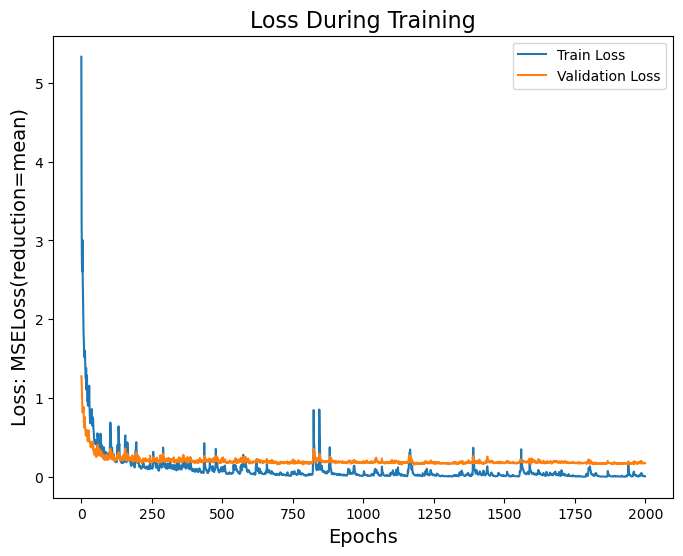

In [8]:
if __name__ == '__main__':
    torch.manual_seed(137)

    # Load data
    train_data = np.load('train_data.npy')
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    # Initialize the model
    model = NeuralNetwork()

    # Train and evaluate
    model = train(model, train_data, validation_data)
    evaluate(model, test_data)

    # Plot training curves
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")
    plot_training_curves(train_losses, val_losses, "MSELoss", "mean")


## f) Run 4 different hyperparameter combinations and explain the differences in results

*Varying network depth*

  0%|          | 2/2000 [00:00<01:49, 18.28it/s]

Epoch 0: Train Loss: 7.67521995306015, Validation Loss: 2.7740013003349304


  5%|▌         | 102/2000 [00:05<01:51, 17.08it/s]

Epoch 100: Train Loss: 0.31534944474697113, Validation Loss: 0.3534841313958168


 10%|█         | 202/2000 [00:11<02:04, 14.45it/s]

Epoch 200: Train Loss: 0.19428525562398136, Validation Loss: 0.26561973989009857


 15%|█▌        | 304/2000 [00:17<01:32, 18.34it/s]

Epoch 300: Train Loss: 0.22116654459387064, Validation Loss: 0.2898200824856758


 20%|██        | 405/2000 [00:23<01:23, 19.03it/s]

Epoch 400: Train Loss: 0.09092331724241376, Validation Loss: 0.25220417976379395


 25%|██▌       | 504/2000 [00:29<01:25, 17.48it/s]

Epoch 500: Train Loss: 0.043571942020207644, Validation Loss: 0.2279716469347477


 30%|███       | 604/2000 [00:34<01:15, 18.56it/s]

Epoch 600: Train Loss: 0.09559048339724541, Validation Loss: 0.22688471525907516


 35%|███▌      | 704/2000 [00:39<01:13, 17.57it/s]

Epoch 700: Train Loss: 0.025667349225841463, Validation Loss: 0.21038345247507095


 40%|████      | 804/2000 [00:45<01:06, 18.03it/s]

Epoch 800: Train Loss: 0.11595132434740663, Validation Loss: 0.23247642815113068


 45%|████▌     | 905/2000 [00:50<00:57, 18.93it/s]

Epoch 900: Train Loss: 0.05517385574057698, Validation Loss: 0.23497498780488968


 50%|█████     | 1003/2000 [00:56<00:59, 16.76it/s]

Epoch 1000: Train Loss: 0.017845613416284323, Validation Loss: 0.21112452447414398


 55%|█████▌    | 1104/2000 [01:01<00:48, 18.38it/s]

Epoch 1100: Train Loss: 0.014272683358285576, Validation Loss: 0.19122963398694992


 60%|██████    | 1204/2000 [01:07<00:43, 18.30it/s]

Epoch 1200: Train Loss: 0.07264694117475301, Validation Loss: 0.2620246186852455


 65%|██████▌   | 1302/2000 [01:13<00:45, 15.22it/s]

Epoch 1300: Train Loss: 0.03737532504601404, Validation Loss: 0.24239999055862427


 70%|███████   | 1403/2000 [01:19<00:32, 18.50it/s]

Epoch 1400: Train Loss: 0.19603346730582416, Validation Loss: 0.2725531607866287


 75%|███████▌  | 1504/2000 [01:26<00:25, 19.13it/s]

Epoch 1500: Train Loss: 0.013388197839958593, Validation Loss: 0.2231336273252964


 80%|████████  | 1603/2000 [01:31<00:21, 18.33it/s]

Epoch 1600: Train Loss: 0.4161197878420353, Validation Loss: 0.3118981048464775


 85%|████████▌ | 1703/2000 [01:37<00:17, 17.27it/s]

Epoch 1700: Train Loss: 0.018538211879786104, Validation Loss: 0.20981618762016296


 90%|█████████ | 1804/2000 [01:42<00:10, 19.20it/s]

Epoch 1800: Train Loss: 0.042034749523736537, Validation Loss: 0.19102637469768524


 95%|█████████▌| 1903/2000 [01:48<00:05, 18.58it/s]

Epoch 1900: Train Loss: 0.036682893289253116, Validation Loss: 0.23641593009233475


100%|██████████| 2000/2000 [01:53<00:00, 17.62it/s]


TOTAL EVALUATION LOSS: 14.73855


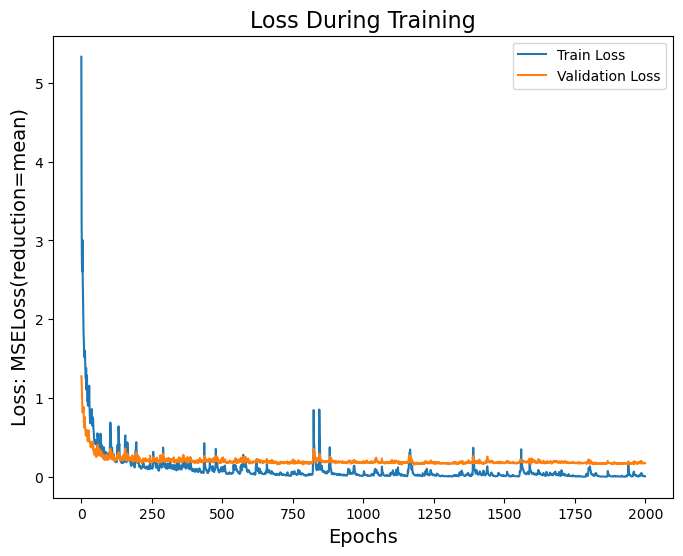

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[32,128,256,320,256,128,32], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()

        layers = []
        in_dim = input_dimension

        for h_dim in hidden:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(activation)
            in_dim = h_dim
        
        
        layers.append(nn.Linear(in_dim, output_dimension))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


def train(model, train_data, validation_data):
    loss_fn = nn.MSELoss()
    epochs = 2000  # You can adjust this
    learning_rate = 1e-3  # You can adjust this
    weight_decay = 1e-8  # You can adjust this
    batch_size = 128  # You can adjust this

    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x, y in validation_loader:
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()

        if ep % 100 == 0:
            print(f"Epoch {ep}: Train Loss: {train_loss}, Validation Loss: {val_loss}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return model

if __name__ == '__main__':
    torch.manual_seed(137)

    # Load data
    train_data = np.load('train_data.npy')
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    # Initialize the model
    model = NeuralNetwork()

    # Train and evaluate
    model = train(model, train_data, validation_data)
    evaluate(model, test_data)
    
    # Plot training curves
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")
    plot_training_curves(train_losses, val_losses, "MSELoss", "mean")



**Explanation**

Network Depth: Varying this refers to changing the number of layers in a neural network. The depth of a neural network is determined by the number of hidden layers it has. Adding or removing layers can significantly impact the model's capacity to learn and, consequently, affect its performance and losses.

Process of how we found the ideal network depth as seen by code section e:
1. We increased the network depth as seen in the above to high code, however this led to overfitting of the model with the training data. Hence, the total evaluation loss were as high as 14.73855 as the validation losses were high.
2. When, we decreased the network depth, our model underfitted the training data which led to high training and validation losses which inturn led to high total evaluation loss.
3. Thus, after doing empirically hypertuning, we found that network depth as seen in code e to be ideal which gave an acceptable total evaluation loss.


*Varying epochs*

  0%|          | 6/10000 [00:00<06:35, 25.26it/s]

Epoch 0: Train Loss: 5.329455599188805, Validation Loss: 1.2769657671451569


  1%|          | 104/10000 [00:04<06:18, 26.18it/s]

Epoch 100: Train Loss: 0.3013339005410671, Validation Loss: 0.3091937229037285


  2%|▏         | 205/10000 [00:08<06:23, 25.55it/s]

Epoch 200: Train Loss: 0.18211006745696068, Validation Loss: 0.21854282170534134


  3%|▎         | 305/10000 [00:11<06:11, 26.07it/s]

Epoch 300: Train Loss: 0.11533759767189622, Validation Loss: 0.1969885379076004


  4%|▍         | 405/10000 [00:15<06:23, 25.04it/s]

Epoch 400: Train Loss: 0.08575547905638814, Validation Loss: 0.18294525146484375


  5%|▌         | 505/10000 [00:19<06:10, 25.65it/s]

Epoch 500: Train Loss: 0.08979652356356382, Validation Loss: 0.19897137954831123


  6%|▌         | 603/10000 [00:23<06:44, 23.21it/s]

Epoch 600: Train Loss: 0.04505224386230111, Validation Loss: 0.18710561096668243


  7%|▋         | 705/10000 [00:27<05:34, 27.77it/s]

Epoch 700: Train Loss: 0.02832318190485239, Validation Loss: 0.174976147711277


  8%|▊         | 805/10000 [00:31<05:41, 26.90it/s]

Epoch 800: Train Loss: 0.026030961540527642, Validation Loss: 0.18314053118228912


  9%|▉         | 904/10000 [00:34<05:29, 27.63it/s]

Epoch 900: Train Loss: 0.03837764705531299, Validation Loss: 0.18592175841331482


 10%|█         | 1005/10000 [00:38<06:16, 23.90it/s]

Epoch 1000: Train Loss: 0.02458283642772585, Validation Loss: 0.17437122762203217


 11%|█         | 1105/10000 [00:42<05:28, 27.08it/s]

Epoch 1100: Train Loss: 0.03362941858358681, Validation Loss: 0.1762428879737854


 12%|█▏        | 1204/10000 [00:46<05:53, 24.91it/s]

Epoch 1200: Train Loss: 0.02815793384797871, Validation Loss: 0.17724738642573357


 13%|█▎        | 1305/10000 [00:50<05:34, 26.02it/s]

Epoch 1300: Train Loss: 0.007269443056429736, Validation Loss: 0.17443522065877914


 14%|█▍        | 1406/10000 [00:54<05:52, 24.40it/s]

Epoch 1400: Train Loss: 0.049344592494890094, Validation Loss: 0.1822688728570938


 15%|█▌        | 1505/10000 [00:58<05:08, 27.50it/s]

Epoch 1500: Train Loss: 0.013515761645976454, Validation Loss: 0.17739278078079224


 16%|█▌        | 1606/10000 [01:02<05:06, 27.39it/s]

Epoch 1600: Train Loss: 0.038904666900634766, Validation Loss: 0.19131050631403923


 17%|█▋        | 1705/10000 [01:06<05:27, 25.36it/s]

Epoch 1700: Train Loss: 0.016256026225164533, Validation Loss: 0.18838884681463242


 18%|█▊        | 1805/10000 [01:09<05:16, 25.92it/s]

Epoch 1800: Train Loss: 0.11628879234194756, Validation Loss: 0.19483798742294312


 19%|█▉        | 1905/10000 [01:13<05:07, 26.36it/s]

Epoch 1900: Train Loss: 0.012391917232889682, Validation Loss: 0.17551154643297195


 20%|██        | 2005/10000 [01:17<05:03, 26.35it/s]

Epoch 2000: Train Loss: 0.011106190009741113, Validation Loss: 0.18223422765731812


 21%|██        | 2106/10000 [01:21<04:44, 27.72it/s]

Epoch 2100: Train Loss: 0.006056767946574837, Validation Loss: 0.17717662453651428


 22%|██▏       | 2205/10000 [01:24<05:05, 25.55it/s]

Epoch 2200: Train Loss: 0.03679923701565713, Validation Loss: 0.1766728088259697


 23%|██▎       | 2304/10000 [01:28<04:55, 26.08it/s]

Epoch 2300: Train Loss: 0.01884621346835047, Validation Loss: 0.17959140986204147


 24%|██▍       | 2406/10000 [01:32<04:50, 26.17it/s]

Epoch 2400: Train Loss: 0.013605035259388387, Validation Loss: 0.1745009422302246


 25%|██▌       | 2505/10000 [01:36<05:00, 24.98it/s]

Epoch 2500: Train Loss: 0.010749840526841581, Validation Loss: 0.17999150604009628


 26%|██▌       | 2606/10000 [01:40<04:44, 26.02it/s]

Epoch 2600: Train Loss: 0.10081586940214038, Validation Loss: 0.20425932854413986


 27%|██▋       | 2704/10000 [01:44<05:03, 24.02it/s]

Epoch 2700: Train Loss: 0.024280795885715634, Validation Loss: 0.1753937155008316


 28%|██▊       | 2806/10000 [01:48<04:28, 26.80it/s]

Epoch 2800: Train Loss: 0.0021841466950718313, Validation Loss: 0.17427894845604897


 29%|██▉       | 2903/10000 [01:51<04:33, 25.99it/s]

Epoch 2900: Train Loss: 0.008433908282313496, Validation Loss: 0.16833757981657982


 30%|███       | 3005/10000 [01:55<04:19, 26.93it/s]

Epoch 3000: Train Loss: 0.004731666820589453, Validation Loss: 0.18565021455287933


 31%|███       | 3104/10000 [01:59<04:54, 23.39it/s]

Epoch 3100: Train Loss: 0.0028213564219186082, Validation Loss: 0.17724603414535522


 32%|███▏      | 3204/10000 [02:03<04:16, 26.49it/s]

Epoch 3200: Train Loss: 0.0065679935505613685, Validation Loss: 0.17990855872631073


 33%|███▎      | 3306/10000 [02:07<04:02, 27.62it/s]

Epoch 3300: Train Loss: 0.014505561790429056, Validation Loss: 0.16640729829669


 34%|███▍      | 3404/10000 [02:10<04:18, 25.47it/s]

Epoch 3400: Train Loss: 0.00564752021455206, Validation Loss: 0.18499656021595


 35%|███▌      | 3503/10000 [02:14<04:33, 23.79it/s]

Epoch 3500: Train Loss: 0.017116175120463595, Validation Loss: 0.17804627865552902


 36%|███▌      | 3606/10000 [02:18<03:53, 27.33it/s]

Epoch 3600: Train Loss: 0.0031452251205337234, Validation Loss: 0.17600642889738083


 37%|███▋      | 3705/10000 [02:22<03:53, 26.96it/s]

Epoch 3700: Train Loss: 0.001064926320395898, Validation Loss: 0.17226658388972282


 38%|███▊      | 3805/10000 [02:26<03:46, 27.39it/s]

Epoch 3800: Train Loss: 0.0009090031962841749, Validation Loss: 0.1713113822042942


 39%|███▉      | 3904/10000 [02:29<03:56, 25.75it/s]

Epoch 3900: Train Loss: 0.0161091519985348, Validation Loss: 0.18444202095270157


 40%|████      | 4005/10000 [02:34<03:35, 27.77it/s]

Epoch 4000: Train Loss: 0.009052135050296783, Validation Loss: 0.1616457775235176


 41%|████      | 4106/10000 [02:37<03:42, 26.47it/s]

Epoch 4100: Train Loss: 0.08412345964461565, Validation Loss: 0.18121609091758728


 42%|████▏     | 4206/10000 [02:41<03:37, 26.63it/s]

Epoch 4200: Train Loss: 0.01084495265968144, Validation Loss: 0.17335616797208786


 43%|████▎     | 4306/10000 [02:45<03:25, 27.68it/s]

Epoch 4300: Train Loss: 0.003962781411246397, Validation Loss: 0.17781047523021698


 44%|████▍     | 4406/10000 [02:49<03:26, 27.15it/s]

Epoch 4400: Train Loss: 0.0008692300725670066, Validation Loss: 0.1741308718919754


 45%|████▌     | 4505/10000 [02:53<03:29, 26.26it/s]

Epoch 4500: Train Loss: 0.004332037555286661, Validation Loss: 0.17519156262278557


 46%|████▌     | 4604/10000 [02:56<03:40, 24.48it/s]

Epoch 4600: Train Loss: 0.00208327871223446, Validation Loss: 0.16967622563242912


 47%|████▋     | 4704/10000 [03:01<04:27, 19.82it/s]

Epoch 4700: Train Loss: 0.003031199077668134, Validation Loss: 0.17502423748373985


 48%|████▊     | 4805/10000 [03:06<03:18, 26.11it/s]

Epoch 4800: Train Loss: 0.0014965900372772012, Validation Loss: 0.1754748336970806


 49%|████▉     | 4906/10000 [03:10<03:07, 27.22it/s]

Epoch 4900: Train Loss: 0.02247006297693588, Validation Loss: 0.17113841697573662


 50%|█████     | 5006/10000 [03:14<03:06, 26.82it/s]

Epoch 5000: Train Loss: 0.051886086352169514, Validation Loss: 0.17634975910186768


 51%|█████     | 5105/10000 [03:18<03:18, 24.63it/s]

Epoch 5100: Train Loss: 0.001310750132688554, Validation Loss: 0.1830192431807518


 52%|█████▏    | 5204/10000 [03:22<03:08, 25.42it/s]

Epoch 5200: Train Loss: 0.00416657590540126, Validation Loss: 0.18662207573652267


 53%|█████▎    | 5306/10000 [03:25<02:58, 26.35it/s]

Epoch 5300: Train Loss: 0.05470434436574578, Validation Loss: 0.18787961080670357


 54%|█████▍    | 5405/10000 [03:29<03:01, 25.28it/s]

Epoch 5400: Train Loss: 0.010140158876311034, Validation Loss: 0.18772770836949348


 55%|█████▌    | 5503/10000 [03:33<02:59, 24.98it/s]

Epoch 5500: Train Loss: 0.005983899463899434, Validation Loss: 0.172319907695055


 56%|█████▌    | 5605/10000 [03:38<03:18, 22.10it/s]

Epoch 5600: Train Loss: 0.0006912128865224076, Validation Loss: 0.16247929260134697


 57%|█████▋    | 5704/10000 [03:42<02:58, 24.06it/s]

Epoch 5700: Train Loss: 0.0017151065258076414, Validation Loss: 0.1653178706765175


 58%|█████▊    | 5806/10000 [03:46<02:46, 25.15it/s]

Epoch 5800: Train Loss: 0.08874362101778388, Validation Loss: 0.20715134590864182


 59%|█████▉    | 5905/10000 [03:50<02:56, 23.15it/s]

Epoch 5900: Train Loss: 0.0010030371176981134, Validation Loss: 0.17072662338614464


 60%|██████    | 6004/10000 [03:54<02:32, 26.18it/s]

Epoch 6000: Train Loss: 0.0013663710706168786, Validation Loss: 0.16952113807201385


 61%|██████    | 6105/10000 [03:58<02:36, 24.93it/s]

Epoch 6100: Train Loss: 0.0034438700531609356, Validation Loss: 0.17061491683125496


 62%|██████▏   | 6204/10000 [04:02<02:27, 25.71it/s]

Epoch 6200: Train Loss: 0.055348749621771276, Validation Loss: 0.16258224844932556


 63%|██████▎   | 6304/10000 [04:06<02:37, 23.51it/s]

Epoch 6300: Train Loss: 0.003469482864602469, Validation Loss: 0.1726314052939415


 64%|██████▍   | 6404/10000 [04:10<02:20, 25.60it/s]

Epoch 6400: Train Loss: 0.0014967218376114033, Validation Loss: 0.17158768326044083


 65%|██████▌   | 6504/10000 [04:14<02:11, 26.57it/s]

Epoch 6500: Train Loss: 0.011300112411845475, Validation Loss: 0.17077894136309624


 66%|██████▌   | 6603/10000 [04:18<02:14, 25.34it/s]

Epoch 6600: Train Loss: 0.0068718502297997475, Validation Loss: 0.16778576374053955


 67%|██████▋   | 6705/10000 [04:22<02:19, 23.66it/s]

Epoch 6700: Train Loss: 0.0005985425232211128, Validation Loss: 0.16709411144256592


 68%|██████▊   | 6804/10000 [04:26<02:07, 25.13it/s]

Epoch 6800: Train Loss: 0.014159689628286287, Validation Loss: 0.17183636501431465


 69%|██████▉   | 6904/10000 [04:30<01:59, 25.84it/s]

Epoch 6900: Train Loss: 0.0009971181007131236, Validation Loss: 0.1672709509730339


 70%|███████   | 7003/10000 [04:34<02:12, 22.69it/s]

Epoch 7000: Train Loss: 0.000897126773452328, Validation Loss: 0.16792281717061996


 71%|███████   | 7105/10000 [04:38<01:59, 24.25it/s]

Epoch 7100: Train Loss: 0.002372006987570785, Validation Loss: 0.17457233741879463


 72%|███████▏  | 7205/10000 [04:42<01:45, 26.39it/s]

Epoch 7200: Train Loss: 0.026132997823879123, Validation Loss: 0.18977833539247513


 73%|███████▎  | 7304/10000 [04:46<01:43, 26.09it/s]

Epoch 7300: Train Loss: 0.001752330717863515, Validation Loss: 0.16752031072974205


 74%|███████▍  | 7403/10000 [04:50<01:40, 25.92it/s]

Epoch 7400: Train Loss: 0.00290361036604736, Validation Loss: 0.16064371913671494


 75%|███████▌  | 7505/10000 [04:54<01:50, 22.53it/s]

Epoch 7500: Train Loss: 0.0007254508091136813, Validation Loss: 0.159431803971529


 76%|███████▌  | 7604/10000 [04:58<01:36, 24.94it/s]

Epoch 7600: Train Loss: 0.00055023917593644, Validation Loss: 0.15898342803120613


 77%|███████▋  | 7703/10000 [05:02<01:36, 23.77it/s]

Epoch 7700: Train Loss: 0.0073160091997124255, Validation Loss: 0.16949854046106339


 78%|███████▊  | 7803/10000 [05:06<01:30, 24.28it/s]

Epoch 7800: Train Loss: 0.0006221646690391935, Validation Loss: 0.17602719366550446


 79%|███████▉  | 7905/10000 [05:11<01:35, 21.84it/s]

Epoch 7900: Train Loss: 0.004141614161198959, Validation Loss: 0.18007898330688477


 80%|████████  | 8004/10000 [05:15<01:20, 24.94it/s]

Epoch 8000: Train Loss: 0.0022059616130718496, Validation Loss: 0.17537981644272804


 81%|████████  | 8103/10000 [05:19<01:20, 23.67it/s]

Epoch 8100: Train Loss: 0.00040633977914694697, Validation Loss: 0.1703179068863392


 82%|████████▏ | 8205/10000 [05:23<01:14, 24.10it/s]

Epoch 8200: Train Loss: 0.0005228271857049549, Validation Loss: 0.1721300147473812


 83%|████████▎ | 8304/10000 [05:27<01:14, 22.63it/s]

Epoch 8300: Train Loss: 0.005138884123880416, Validation Loss: 0.17829899117350578


 84%|████████▍ | 8403/10000 [05:32<01:06, 23.90it/s]

Epoch 8400: Train Loss: 0.018825730308890343, Validation Loss: 0.178884819149971


 85%|████████▌ | 8505/10000 [05:36<01:02, 23.77it/s]

Epoch 8500: Train Loss: 0.001023051307129208, Validation Loss: 0.16720851510763168


 86%|████████▌ | 8604/10000 [05:40<00:58, 23.79it/s]

Epoch 8600: Train Loss: 0.015508796204812825, Validation Loss: 0.1684379279613495


 87%|████████▋ | 8705/10000 [05:45<00:53, 24.01it/s]

Epoch 8700: Train Loss: 0.0055913392279762775, Validation Loss: 0.17058726027607918


 88%|████████▊ | 8804/10000 [05:49<00:53, 22.28it/s]

Epoch 8800: Train Loss: 0.02446075645275414, Validation Loss: 0.17680122703313828


 89%|████████▉ | 8903/10000 [05:54<00:50, 21.86it/s]

Epoch 8900: Train Loss: 0.0036831033939961344, Validation Loss: 0.17706922441720963


 90%|█████████ | 9005/10000 [05:58<00:49, 20.14it/s]

Epoch 9000: Train Loss: 0.01334126913570799, Validation Loss: 0.16487662121653557


 91%|█████████ | 9104/10000 [06:03<00:40, 21.94it/s]

Epoch 9100: Train Loss: 0.0012464437750168145, Validation Loss: 0.17844580113887787


 92%|█████████▏| 9203/10000 [06:07<00:37, 21.54it/s]

Epoch 9200: Train Loss: 0.005109826888656244, Validation Loss: 0.1752118393778801


 93%|█████████▎| 9305/10000 [06:12<00:32, 21.33it/s]

Epoch 9300: Train Loss: 0.0017871305317385122, Validation Loss: 0.17617342621088028


 94%|█████████▍| 9402/10000 [06:17<00:28, 20.73it/s]

Epoch 9400: Train Loss: 0.018794178613461554, Validation Loss: 0.1870819441974163


 95%|█████████▌| 9504/10000 [06:22<00:24, 20.22it/s]

Epoch 9500: Train Loss: 0.0013279602644615807, Validation Loss: 0.1806226521730423


 96%|█████████▌| 9603/10000 [06:27<00:20, 19.45it/s]

Epoch 9600: Train Loss: 0.001464067681808956, Validation Loss: 0.180100217461586


 97%|█████████▋| 9702/10000 [06:32<00:15, 18.77it/s]

Epoch 9700: Train Loss: 0.0010470097950019408, Validation Loss: 0.1767144612967968


 98%|█████████▊| 9804/10000 [06:38<00:09, 19.74it/s]

Epoch 9800: Train Loss: 0.0020862993333139457, Validation Loss: 0.17679491266608238


 99%|█████████▉| 9903/10000 [06:43<00:05, 19.11it/s]

Epoch 9900: Train Loss: 0.014902108698152006, Validation Loss: 0.16692155972123146


100%|██████████| 10000/10000 [06:48<00:00, 24.46it/s]


TOTAL EVALUATION LOSS: 10.75199


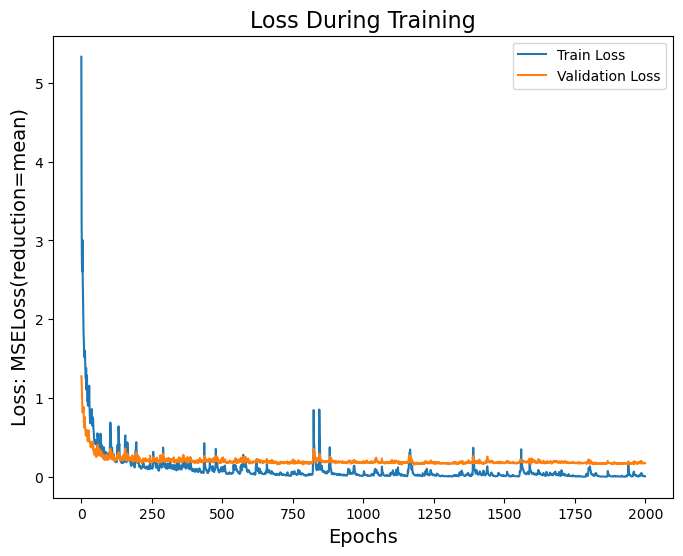

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[256,320,256], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()

        layers = []
        in_dim = input_dimension

        for h_dim in hidden:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(activation)
            in_dim = h_dim
        
        
        layers.append(nn.Linear(in_dim, output_dimension))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)



def train(model, train_data, validation_data):
    loss_fn = nn.MSELoss()
    epochs = 10000  # You can adjust this
    learning_rate = 1e-3  # You can adjust this
    weight_decay = 1e-8  # You can adjust this
    batch_size = 128  # You can adjust this

    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x, y in validation_loader:
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()

        if ep % 100 == 0:
            print(f"Epoch {ep}: Train Loss: {train_loss}, Validation Loss: {val_loss}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return model

if __name__ == '__main__':
    torch.manual_seed(137)

    # Load data
    train_data = np.load('train_data.npy')
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    # Initialize the model
    model = NeuralNetwork()

    # Train and evaluate
    model = train(model, train_data, validation_data)
    evaluate(model, test_data)
    
    # Plot training curves
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")
    plot_training_curves(train_losses, val_losses, "MSELoss", "mean")



**Explanation**

Epoch: It is one complete pass through the entire training dataset. During each epoch, the model goes through all the training examples, updates its weights, and adjusts its parameters to minimize the loss function. The number of epochs is a hyperparameter that defines how many times the learning algorithm will work through the entire training dataset.

Process of how we found the ideal number of epochs as seen by code section e:

1. Intially, we worked with 1500 epochs, and we go a total evaluation loss of 10.66909. Possible reason for this maybe is that with less number of epochs, the model may not have sufficient opportunities to learn from the training data, leading to underfitting. The model will not capture the underlying patterns in the data, resulting in high training and validation losses.
2. By increasing the number of epochs we were able to decrease the accuracy. Now, when we increased the number of epochs to 10,000 the total evaluation loss increased to 10.75199. Possible reason for this is that, the model over fitted the training data and hence, the validation loss came high.
3. Thus, after doing empirically hypertuning, we found that 3000 epochs gave an acceptable total evaluation loss which can be seen in code e.


*Varying Learning rate*

  0%|          | 6/2000 [00:00<01:13, 27.03it/s]

Epoch 0: Train Loss: 21.161539375782013, Validation Loss: 2.290491223335266


  5%|▌         | 105/2000 [00:03<01:08, 27.53it/s]

Epoch 100: Train Loss: 0.5132376551628113, Validation Loss: 0.3546246662735939


 10%|█         | 204/2000 [00:07<01:05, 27.45it/s]

Epoch 200: Train Loss: 0.32656738720834255, Validation Loss: 0.26189717650413513


 15%|█▌        | 306/2000 [00:11<01:01, 27.43it/s]

Epoch 300: Train Loss: 0.2123641027137637, Validation Loss: 0.20818423479795456


 20%|██        | 406/2000 [00:15<00:58, 27.46it/s]

Epoch 400: Train Loss: 0.17056378349661827, Validation Loss: 0.22420527040958405


 25%|██▌       | 505/2000 [00:18<00:53, 27.88it/s]

Epoch 500: Train Loss: 0.1224317904561758, Validation Loss: 0.22312165424227715


 30%|███       | 606/2000 [00:22<00:57, 24.23it/s]

Epoch 600: Train Loss: 0.09802017593756318, Validation Loss: 0.19542456790804863


 35%|███▌      | 705/2000 [00:26<00:50, 25.45it/s]

Epoch 700: Train Loss: 0.19447928853332996, Validation Loss: 0.27699969708919525


 40%|████      | 804/2000 [00:30<00:52, 22.73it/s]

Epoch 800: Train Loss: 0.06555863382527605, Validation Loss: 0.208041962236166


 45%|████▌     | 903/2000 [00:34<00:45, 24.33it/s]

Epoch 900: Train Loss: 0.09208452608436346, Validation Loss: 0.21431752294301987


 50%|█████     | 1005/2000 [00:38<00:39, 25.20it/s]

Epoch 1000: Train Loss: 0.3991707731038332, Validation Loss: 0.25158537924289703


 55%|█████▌    | 1104/2000 [00:42<00:35, 25.11it/s]

Epoch 1100: Train Loss: 0.0863072369247675, Validation Loss: 0.2260098047554493


 60%|██████    | 1206/2000 [00:46<00:32, 24.24it/s]

Epoch 1200: Train Loss: 0.044115085154771805, Validation Loss: 0.20011551678180695


 65%|██████▌   | 1305/2000 [00:50<00:27, 25.28it/s]

Epoch 1300: Train Loss: 0.07545772707089782, Validation Loss: 0.17821145057678223


 70%|███████   | 1404/2000 [00:54<00:24, 24.50it/s]

Epoch 1400: Train Loss: 0.1385051803663373, Validation Loss: 0.2056247591972351


 75%|███████▌  | 1506/2000 [00:58<00:19, 25.01it/s]

Epoch 1500: Train Loss: 0.04835308203473687, Validation Loss: 0.22690443694591522


 80%|████████  | 1605/2000 [01:03<00:16, 24.59it/s]

Epoch 1600: Train Loss: 0.19041527528315783, Validation Loss: 0.23841030895709991


 85%|████████▌ | 1704/2000 [01:07<00:12, 24.53it/s]

Epoch 1700: Train Loss: 0.12155978940427303, Validation Loss: 0.22420481592416763


 90%|█████████ | 1803/2000 [01:11<00:08, 24.62it/s]

Epoch 1800: Train Loss: 0.06414499180391431, Validation Loss: 0.19109946116805077


 95%|█████████▌| 1905/2000 [01:15<00:03, 24.48it/s]

Epoch 1900: Train Loss: 0.05247543309815228, Validation Loss: 0.19347607716917992


100%|██████████| 2000/2000 [01:19<00:00, 25.15it/s]


TOTAL EVALUATION LOSS: 13.98371


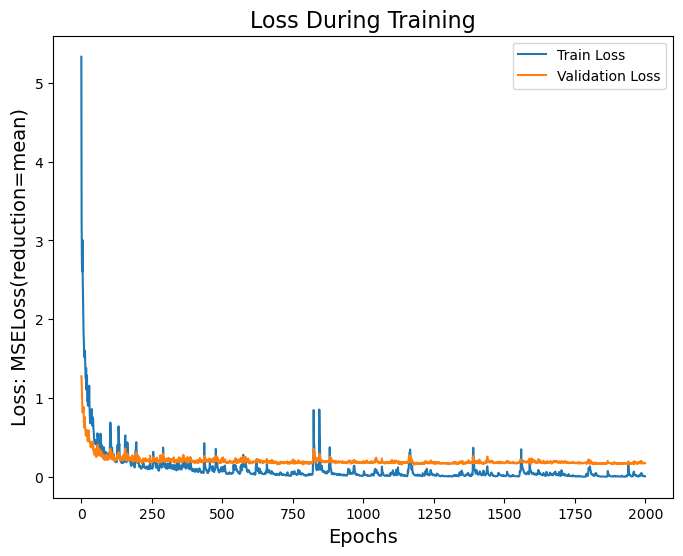

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[256,320,256], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()

        layers = []
        in_dim = input_dimension

        for h_dim in hidden:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(activation)
            in_dim = h_dim
        
        
        layers.append(nn.Linear(in_dim, output_dimension))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)



def train(model, train_data, validation_data):
    loss_fn = nn.MSELoss()
    epochs = 2000  # You can adjust this
    learning_rate = 1e-2  # You can adjust this
    weight_decay = 1e-8  # You can adjust this
    batch_size = 128  # You can adjust this

    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x, y in validation_loader:
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()

        if ep % 100 == 0:
            print(f"Epoch {ep}: Train Loss: {train_loss}, Validation Loss: {val_loss}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return model

if __name__ == '__main__':
    torch.manual_seed(137)

    # Load data
    train_data = np.load('train_data.npy')
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    # Initialize the model
    model = NeuralNetwork()

    # Train and evaluate
    model = train(model, train_data, validation_data)
    evaluate(model, test_data)
    
    # Plot training curves
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")
    plot_training_curves(train_losses, val_losses, "MSELoss", "mean")



**Explanation**

Learning Rate: It is a scalar value that multiplies the gradient during backpropagation. The gradient indicates the direction in which the weights of the neural network should be adjusted to minimize the error. The learning rate determines the size of the steps taken in that direction.

Process of how we found the ideal learning rate as seen by code section e:
1. Intially we used the learning rate of 1e-2 as seen in the above code. This gave total evaluation loss of 13.98371, which was not ideal for us. Possible reason for this was maybe the learning rate was too high and the model was overshooting the minimum weights.
2. We decreased the learning rate to 1e-4 as well however, still he loss was not in an acceptable range. possible reason for this maybe that our gradients of weights were stuck in local minima and a small learning rate as this was not sufficient enough to find the global minima for 2000 epochs.
3. We settled on using 1e-3 as the learning rate which gave an acceptable total evaluation loss of 9.80791.

*Varying weight decay and batch size*

  0%|          | 8/2000 [00:00<00:57, 34.38it/s]

Epoch 0: Train Loss: 3.3756529688835144, Validation Loss: 1.2951562404632568


  5%|▌         | 105/2000 [00:03<00:52, 36.08it/s]

Epoch 100: Train Loss: 0.12912451475858688, Validation Loss: 0.21347647905349731


 10%|█         | 206/2000 [00:05<00:48, 36.63it/s]

Epoch 200: Train Loss: 0.05929956212639809, Validation Loss: 0.16169967874884605


 15%|█▌        | 307/2000 [00:08<00:47, 35.91it/s]

Epoch 300: Train Loss: 0.03536670282483101, Validation Loss: 0.1357504278421402


 20%|██        | 406/2000 [00:11<00:45, 35.04it/s]

Epoch 400: Train Loss: 0.031600013840943575, Validation Loss: 0.14476994425058365


 25%|██▌       | 504/2000 [00:14<00:50, 29.64it/s]

Epoch 500: Train Loss: 0.025222832337021828, Validation Loss: 0.13962018489837646


 30%|███       | 605/2000 [00:17<00:38, 36.35it/s]

Epoch 600: Train Loss: 0.018840492703020573, Validation Loss: 0.14572148025035858


 35%|███▌      | 706/2000 [00:20<00:37, 34.52it/s]

Epoch 700: Train Loss: 0.012062224792316556, Validation Loss: 0.13396374136209488


 40%|████      | 802/2000 [00:23<00:37, 32.06it/s]

Epoch 800: Train Loss: 0.017328542890027165, Validation Loss: 0.14807871356606483


 45%|████▌     | 904/2000 [00:26<00:30, 36.09it/s]

Epoch 900: Train Loss: 0.007920219446532428, Validation Loss: 0.11995750665664673


 50%|█████     | 1007/2000 [00:29<00:30, 33.08it/s]

Epoch 1000: Train Loss: 0.009172058082185686, Validation Loss: 0.13173939660191536


 55%|█████▌    | 1105/2000 [00:32<00:25, 35.40it/s]

Epoch 1100: Train Loss: 0.021850590594112873, Validation Loss: 0.1307375729084015


 60%|██████    | 1207/2000 [00:35<00:23, 34.11it/s]

Epoch 1200: Train Loss: 0.0034005542402155697, Validation Loss: 0.11920496821403503


 65%|██████▌   | 1305/2000 [00:38<00:19, 35.68it/s]

Epoch 1300: Train Loss: 0.004308852716349065, Validation Loss: 0.13528356328606606


 70%|███████   | 1407/2000 [00:41<00:17, 33.27it/s]

Epoch 1400: Train Loss: 0.0022149470751173794, Validation Loss: 0.1180134266614914


 75%|███████▌  | 1503/2000 [00:44<00:26, 18.47it/s]

Epoch 1500: Train Loss: 0.006480068317614496, Validation Loss: 0.1319584883749485


 80%|████████  | 1606/2000 [00:48<00:11, 33.07it/s]

Epoch 1600: Train Loss: 0.0028374146204441786, Validation Loss: 0.11953338980674744


 85%|████████▌ | 1706/2000 [00:51<00:08, 35.22it/s]

Epoch 1700: Train Loss: 0.013280679588206112, Validation Loss: 0.11085762456059456


 90%|█████████ | 1806/2000 [00:55<00:06, 27.74it/s]

Epoch 1800: Train Loss: 0.004105026135221124, Validation Loss: 0.11691385507583618


 95%|█████████▌| 1905/2000 [00:59<00:02, 34.83it/s]

Epoch 1900: Train Loss: 0.007106475182808936, Validation Loss: 0.12158218026161194


100%|██████████| 2000/2000 [01:02<00:00, 32.00it/s]


TOTAL EVALUATION LOSS: 12.04916


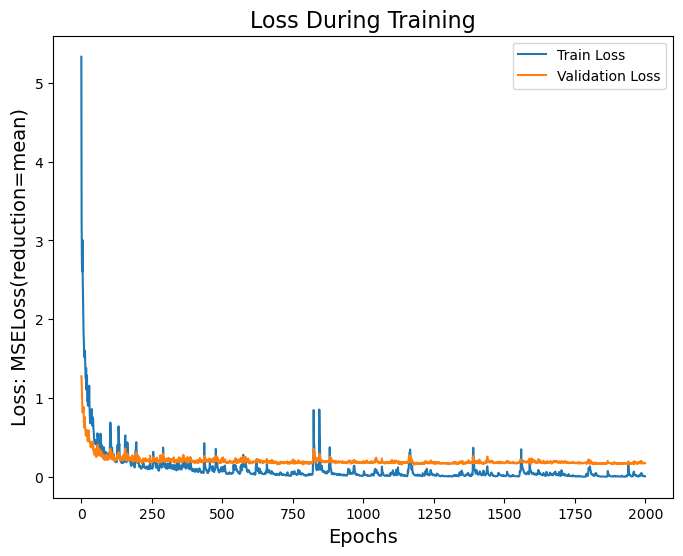

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[256,320,256], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()

        layers = []
        in_dim = input_dimension

        for h_dim in hidden:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(activation)
            in_dim = h_dim
        
        
        layers.append(nn.Linear(in_dim, output_dimension))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)



def train(model, train_data, validation_data):
    loss_fn = nn.MSELoss()
    epochs = 2000  # You can adjust this
    learning_rate = 1e-3  # You can adjust this
    weight_decay = 1e-9  # You can adjust this
    batch_size = 256  # You can adjust this

    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x, y in validation_loader:
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()

        if ep % 100 == 0:
            print(f"Epoch {ep}: Train Loss: {train_loss}, Validation Loss: {val_loss}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return model

if __name__ == '__main__':
    torch.manual_seed(137)

    # Load data
    train_data = np.load('train_data.npy')
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    # Initialize the model
    model = NeuralNetwork()

    # Train and evaluate
    model = train(model, train_data, validation_data)
    evaluate(model, test_data)
    
    # Plot training curves
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")
    plot_training_curves(train_losses, val_losses, "MSELoss", "mean")



Weight decay: It is a regularization technique that adds a penalty term to the loss function based on the magnitude of the weights.
Batch size: It refers to the number of training examples used in a single iteration of learning epoch.

Process of how we found the ideal Weight decay and Batch size as seen by code section e:

1. When we kept high batch size of 256 and low weight decay of 1e-9, the total evaluation losses were 12.04916. Possible reason for this with high batch size, while aiding faster convergence, the model has the risk of over-smoothing the optimization process, potentially hindering generalization to unseen data. Meanwhile, low weight decay reduces the regularization effect, making the model more susceptible to overfitting by allowing it to fit training data noise rather than learning essential patterns. This combination could result in a model with increased losses, particularly on validation datasets, as it might fail to generalize effectively.  

2. When we kept low batch size and high weight decay, the total evaluation losses were still high, as a low batch size might lead to noisy gradient updates, hindering the stability of the optimization process and potentially slowing down convergence. Meanwhile, high weight decay, which penalizes large weights, may overly constrain the model, making it less capable of capturing essential patterns in the data. The combination of these factors could result in a model that struggles to generalize, leading to higher losses, particularly on validation or test datasets.

3. Thus, after emipirically tuning these parameters we found batch size of 128 and weight decay of 1e-8 to be ideal with a total evaluation loss of 9.80791
